In [ ]:
import os
import numpy as np
import pandas as pd

import seaborn as sns

In [ ]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [ ]:
path=  "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0232EN-SkillsNetwork/asset/iris_data.csv"
data= pd.read_csv(path)
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
data.shape

(150, 5)

In [ ]:
# no of rows
data.shape[0]

150

In [ ]:
# no of columns
data.shape[1]

5

In [ ]:
data.columns.to_list()

['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

In [ ]:
data.columns.tolist()

['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

In [ ]:
data.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [ ]:
data['species'].values

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolo

In [ ]:
data['species']= data.species.str.replace('Iris-', '')
data['species'].values

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolo

In [ ]:
data.species.value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [ ]:
stats_df = data.describe()
stats_df

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Determine the mean, median, and quantiles and ranges (max-min) for each petal and sepal measurement

In [ ]:
stats_df.loc['range']= stats_df.loc['max'] - stats_df.loc['min']
out_fields= ['mean', '25%', '50%', '75%', 'range']
stats_df= stats_df.loc[out_fields]
stats_df

,sepal_length,sepal_width,petal_length,petal_width
mean,5.843333,3.054,3.758667,1.198667
25%,5.100000,2.800,1.600000,0.300000
50%,5.800000,3.000,4.350000,1.300000
75%,6.400000,3.300,5.100000,1.800000
range,3.600000,2.400,5.900000,2.400000


In [ ]:
stats_df.rename({'50%': 'median'}, inplace= True)
stats_df

,sepal_length,sepal_width,petal_length,petal_width
mean,5.843333,3.054,3.758667,1.198667
25%,5.100000,2.800,1.600000,0.300000
median,5.800000,3.000,4.350000,1.300000
75%,6.400000,3.300,5.100000,1.800000
range,3.600000,2.400,5.900000,2.400000


Calculate the following for each species in a separate dataframe:

The mean of each measurement (sepal_length, sepal_width,petal_length, and petal_width).

The median of each of these measurements.

In [ ]:
# The mean calculation
data.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.418,1.464,0.244
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [ ]:
# The median calculation
data.groupby('species').median()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.0,3.4,1.50,0.2
versicolor,5.9,2.8,4.35,1.3
virginica,6.5,3.0,5.55,2.0


In [ ]:
# applying multiple functions at once - 2 methods

data.groupby('species').agg(['mean', 'median'])  # passing a list of recognized strings
data.groupby('species').agg([np.mean, np.median]) # passing a list of explicit aggregation function

sepal_length        sepal_width        petal_length         \
                   mean median        mean median         mean median   
species                                                                 
setosa            5.006    5.0       3.418    3.4        1.464   1.50   
versicolor        5.936    5.9       2.770    2.8        4.260   4.35   
virginica         6.588    6.5       2.974    3.0        5.552   5.55   

           petal_width         
                  mean median  
species                        
setosa           0.244    0.2  
versicolor       1.326    1.3  
virginica        2.026    2.0

In [ ]:
from pprint import pprint

agg_dict = {field: ['mean', 'median'] for field in data.columns if field != 'species'}
agg_dict

{'sepal_length': ['mean', 'median'],
 'sepal_width': ['mean', 'median'],
 'petal_length': ['mean', 'median'],
 'petal_width': ['mean', 'median']}

In [ ]:
agg_dict['petal_length'] = 'max'
pprint(agg_dict)

{'petal_length': 'max',
 'petal_width': ['mean', 'median'],
 'sepal_length': ['mean', 'median'],
 'sepal_width': ['mean', 'median']}


In [ ]:
data.groupby('species').agg(agg_dict)

sepal_length        sepal_width        petal_length petal_width  \
                   mean median        mean median          max        mean   
species                                                                      
setosa            5.006    5.0       3.418    3.4          1.9       0.244   
versicolor        5.936    5.9       2.770    2.8          5.1       1.326   
virginica         6.588    6.5       2.974    3.0          6.9       2.026   

                   
           median  
species            
setosa        0.2  
versicolor    1.3  
virginica     2.0

## **Make a scatter plot of sepal_length vs sepal_width using Matplotlib. Label the axes and give the plot a title.**

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

[Text(0.5, 0, 'Sepal Length (cm)'),
 Text(0, 0.5, 'Sepal Width (cm)'),
 Text(0.5, 1.0, 'Sepal Length vs Width')]

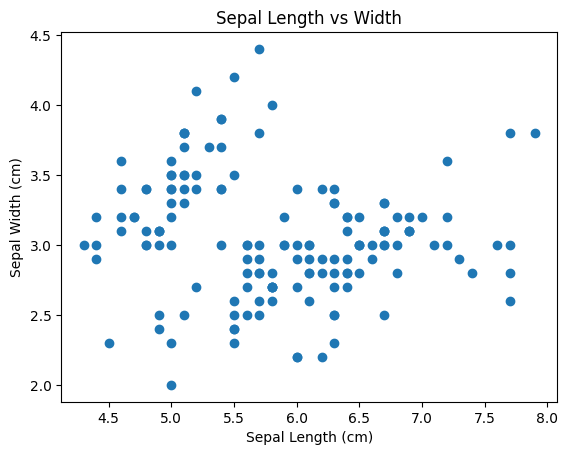

In [ ]:
ax= plt.axes()
ax.scatter(data.sepal_length, data.sepal_width)

ax.set(xlabel= 'Sepal Length (cm)',
       ylabel= 'Sepal Width (cm)',
       title= 'Sepal Length vs Width')

# **Histogram**

**Make a histogram of any one of the four features. Label axes and title it as appropriate.**

[Text(0.5, 0, 'Petal Length (cm)'),
 Text(0, 0.5, 'Frequency'),
 Text(0.5, 1.0, 'Distribution of Petal Lengths')]

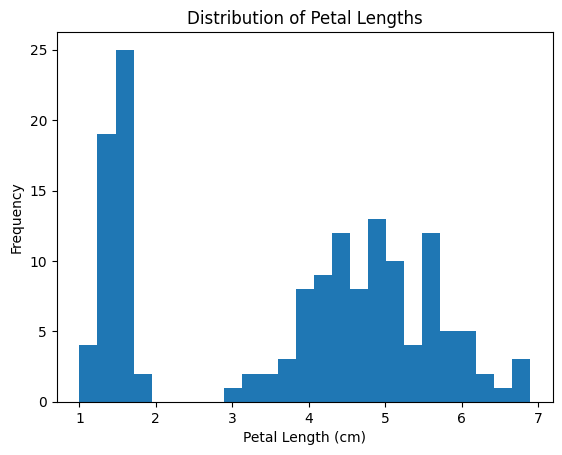

In [ ]:
# Using Matplotlib's plotting functionality
ax= plt.axes()

ax.hist(data.petal_length, bins=25)
ax.set(xlabel='Petal Length (cm)',
       ylabel='Frequency',
       title='Distribution of Petal Lengths')

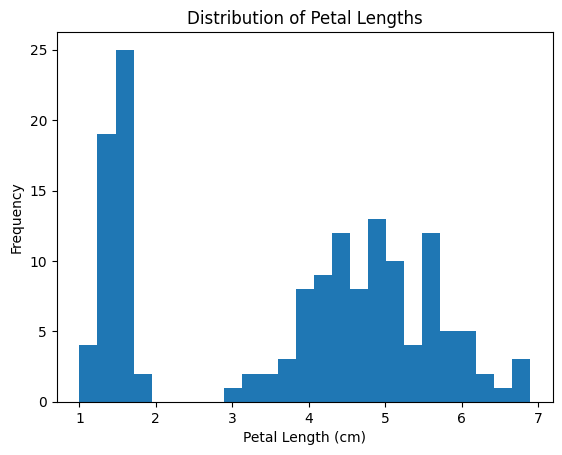

In [ ]:
# Alternatively using Pandas plotting functionality
ax= data.petal_length.plot.hist(bins=25)

ax.set(xlabel='Petal Length (cm)',
       ylabel='Frequency',
       title='Distribution of Petal Lengths')
plt.show()

**To create four histograms in a single plot use 'data.plot.hist'**

Text(0.5, 0, 'Size (cm)')

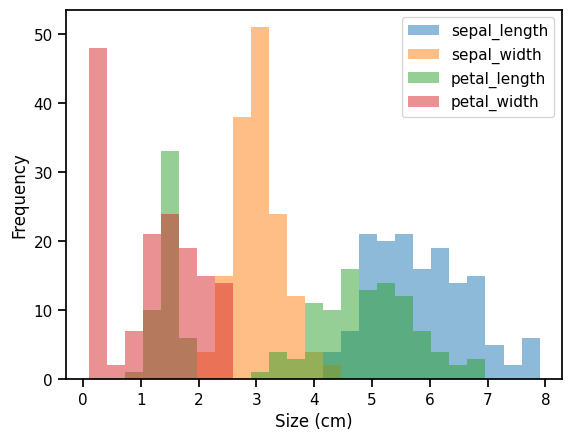

In [ ]:
sns.set_context('notebook')

ax= data.plot.hist(bins= 25, alpha=0.5)
ax.set_xlabel('Size (cm)')

**To create four separate plots use 'data.hist'**

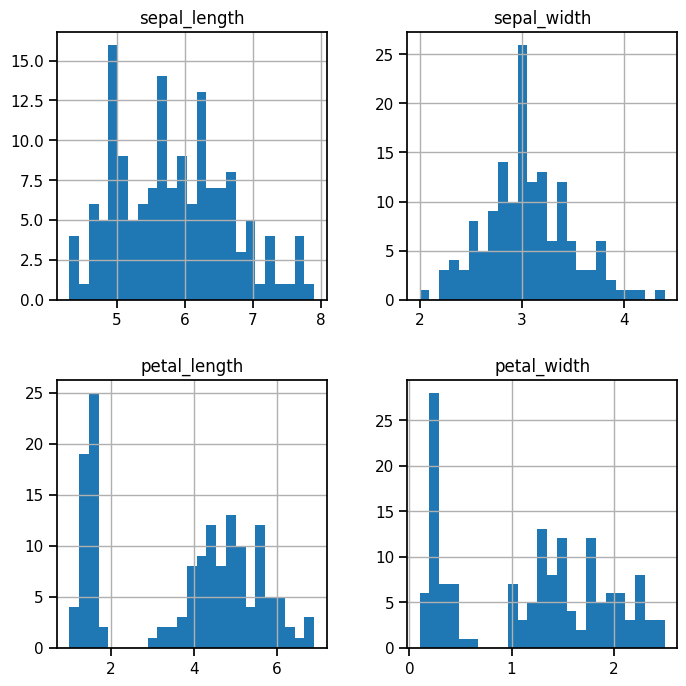

In [ ]:
# To create four separate plots, use Pandas `.hist` method
axList= data.hist(bins=25, figsize=(8,8))

In [ ]:
axList.flatten().shape

(4,)

In [ ]:
#axList.flatten()[0].is_last_row()

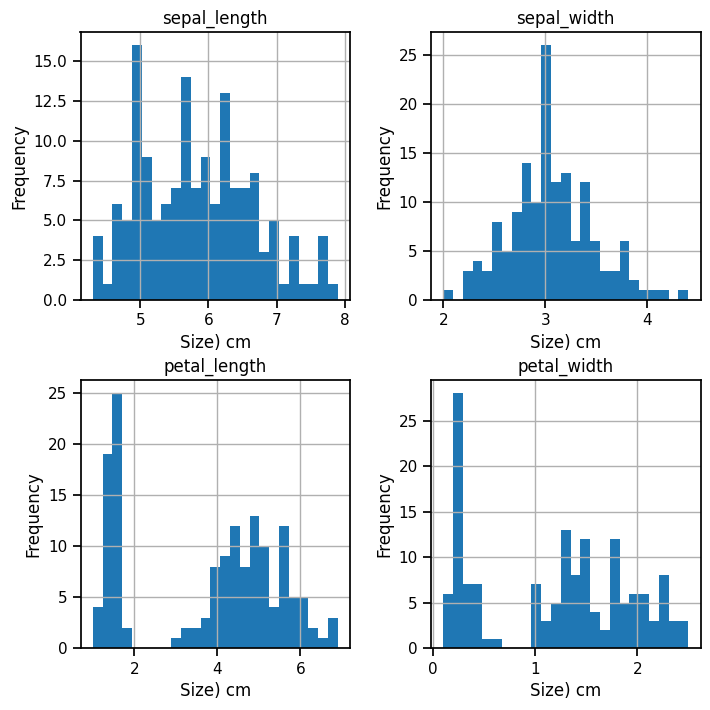

In [ ]:
# To create four separate plots, use Pandas `.hist` method
axList= data.hist(bins=25, figsize=(8,8))

# Add some x- and y- labels to first column and last row
for ax in axList.flatten():
  #if ax.is_last_row():
    ax.set_xlabel('Size) cm')
    #if ax.is_first_col():
    ax.set_ylabel('Frequency')

# **Boxplot**

array([[<Axes: title={'center': 'petal_length'}, xlabel='[species]'>,
        <Axes: title={'center': 'petal_width'}, xlabel='[species]'>],
       [<Axes: title={'center': 'sepal_length'}, xlabel='[species]'>,
        <Axes: title={'center': 'sepal_width'}, xlabel='[species]'>]],
      dtype=object)

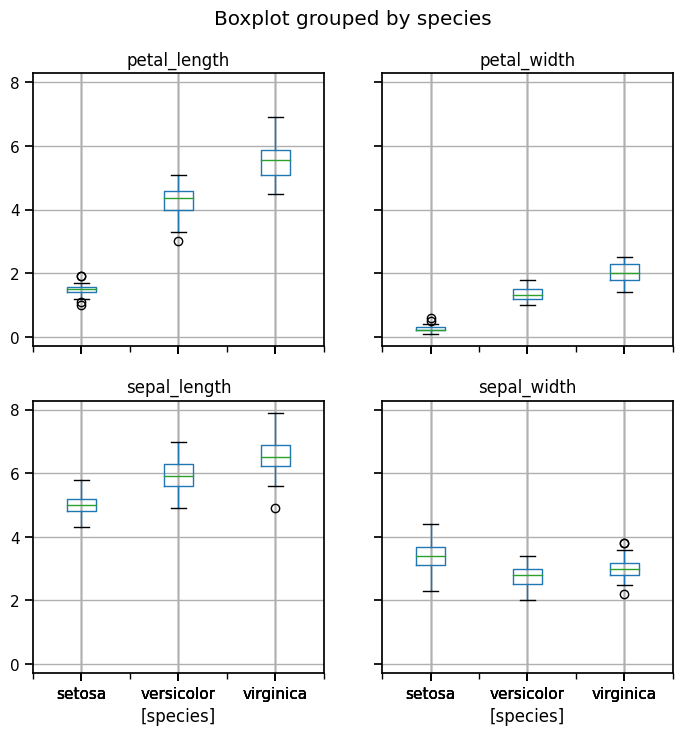

In [ ]:
# Here we have four separate plots
data.boxplot(by= 'species', figsize=(8,8))

In [ ]:
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


# **Deep Data Analysis(data wrangling)**

In [ ]:
df= data[:]
df.set_index('species').stack().to_frame().reset_index().rename(columns={0: 'size', 'level_1': 'measurement'}).head()

,species,measurement,size
0,setosa,sepal_length,5.1
1,setosa,sepal_width,3.5
2,setosa,petal_length,1.4
3,setosa,petal_width,0.2
4,setosa,sepal_length,4.9


In [ ]:
# First we have to reshape the data so there is only a single measurement in each column
plot_data= (data
            .set_index('species')
            .stack()
            .to_frame()
            .reset_index()
            .rename(columns={0: 'size', 'level_1': 'measurement'})
            )
plot_data.head()

,species,measurement,size
0,setosa,sepal_length,5.1
1,setosa,sepal_width,3.5
2,setosa,petal_length,1.4
3,setosa,petal_width,0.2
4,setosa,sepal_length,4.9


In [ ]:
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
df2= data[:]

# pivoting wide to long
long_data= df2.stack().reset_index().rename(columns={0: 'value', 'level_1': 'variables', 'level_0': 'index'})
long_data.head(10)

,index,variables,value
0,0,sepal_length,5.1
1,0,sepal_width,3.5
2,0,petal_length,1.4
3,0,petal_width,0.2
4,0,species,setosa
5,1,sepal_length,4.9
6,1,sepal_width,3.0
7,1,petal_length,1.4
8,1,petal_width,0.2
9,1,species,setosa


In [ ]:
# pivoting wide to long
melted = pd.melt(df2, ['species'])
melted.head(10)

,species,variable,value
0,setosa,sepal_length,5.1
1,setosa,sepal_length,4.9
2,setosa,sepal_length,4.7
3,setosa,sepal_length,4.6
4,setosa,sepal_length,5.0
5,setosa,sepal_length,5.4
6,setosa,sepal_length,4.6
7,setosa,sepal_length,5.0
8,setosa,sepal_length,4.4
9,setosa,sepal_length,4.9


In [ ]:
# pivoting long to wide
pivoted = ldata.pivot(index='index', columns='variables', values='value')
pivoted

variables,petal_length,petal_width,sepal_length,sepal_width,species
index,,,,,
0,1.4,0.2,5.1,3.5,setosa
1,1.4,0.2,4.9,3.0,setosa
2,1.3,0.2,4.7,3.2,setosa
3,1.5,0.2,4.6,3.1,setosa
4,1.4,0.2,5.0,3.6,setosa
...,...,...,...,...,...
145,5.2,2.3,6.7,3.0,virginica
146,5.0,1.9,6.3,2.5,virginica
147,5.2,2.0,6.5,3.0,virginica


In [ ]:
# pivoting wide to long
melt= pd.melt(pivoted, ['species'])
melt

,species,variables,value
0,setosa,petal_length,1.4
1,setosa,petal_length,1.4
2,setosa,petal_length,1.3
3,setosa,petal_length,1.5
4,setosa,petal_length,1.4
...,...,...,...
595,virginica,sepal_width,3.0
596,virginica,sepal_width,2.5
597,virginica,sepal_width,3.0
598,virginica,sepal_width,3.4


<Axes: xlabel='measurement', ylabel='size'>

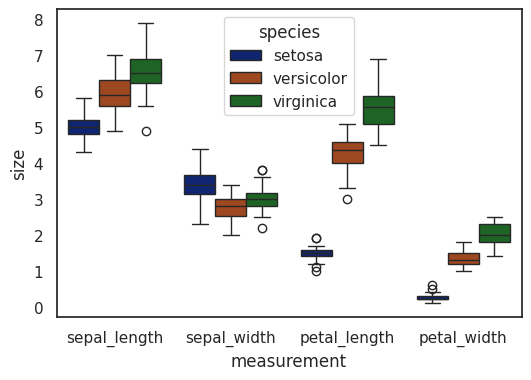

In [ ]:
sns.set_style('white')
sns.set_context('notebook')
sns.set_palette('dark')

f= plt.figure(figsize= (6,4))
sns.boxplot(x= 'measurement', y='size', hue= 'species', data= plot_data)

# **PAIRPLOT**

Make a pairplot with Seaborn to examine the correlation between each of the measurements.

Hint: this plot may look complicated, but it is actually only a single line of code. This is the power of Seaborn and dataframe-aware plotting!

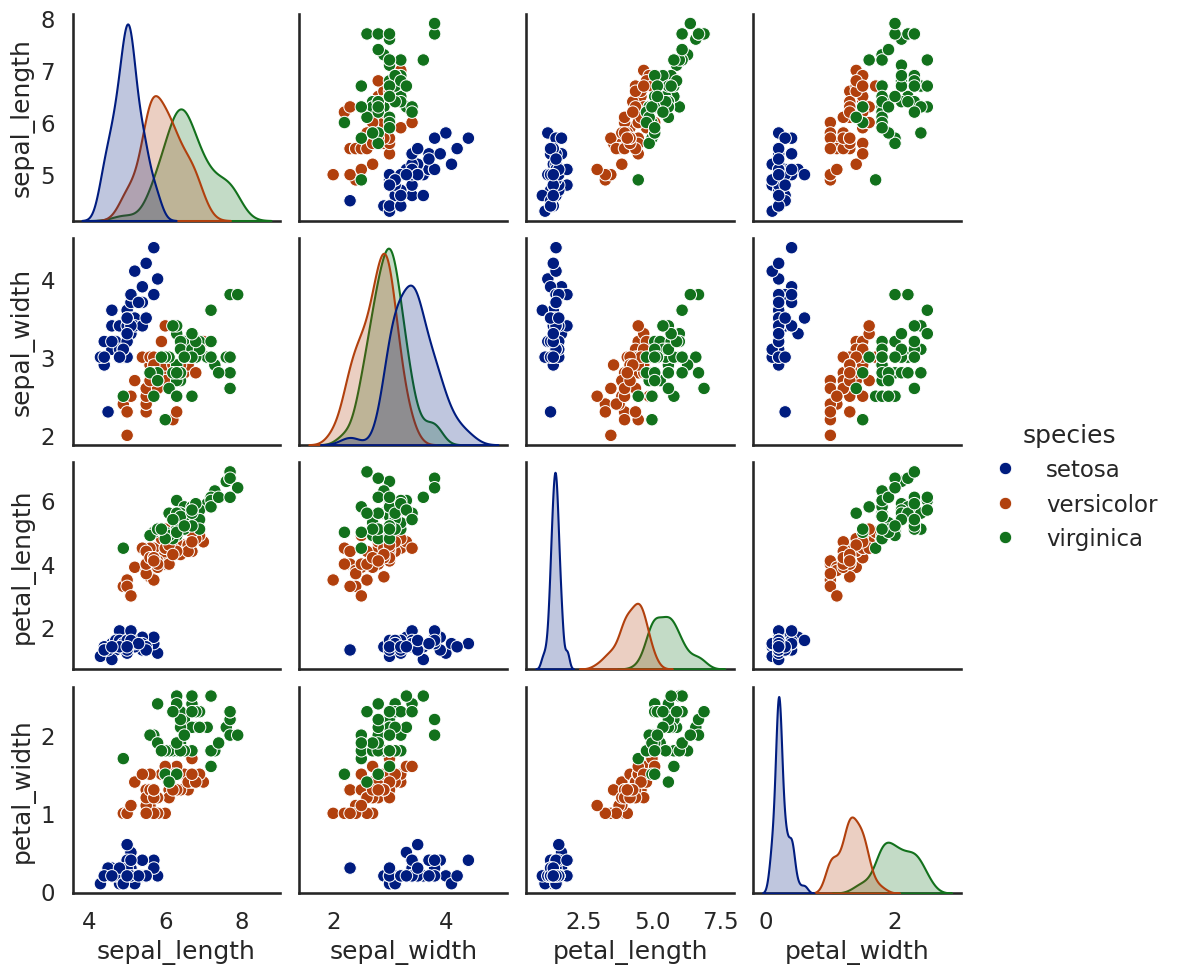

In [ ]:
sns.set_context('talk')
sns.pairplot(data, hue= 'species')

# **Grouping data for EDA**
**customizing plots by group**

<Axes: xlabel='species'>

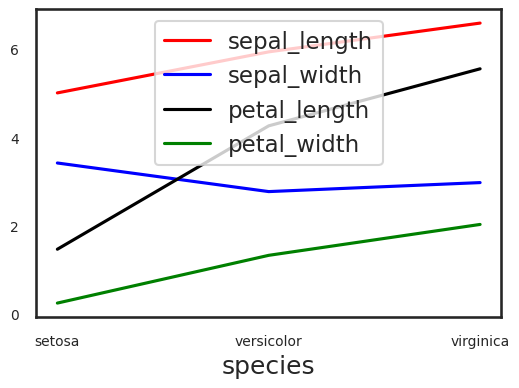

In [ ]:
# Pandas dataframe approach

data.groupby('species').mean().plot(color=['red', 'blue', 'black', 'green'],
                                    fontsize=10, figsize=(6,4))

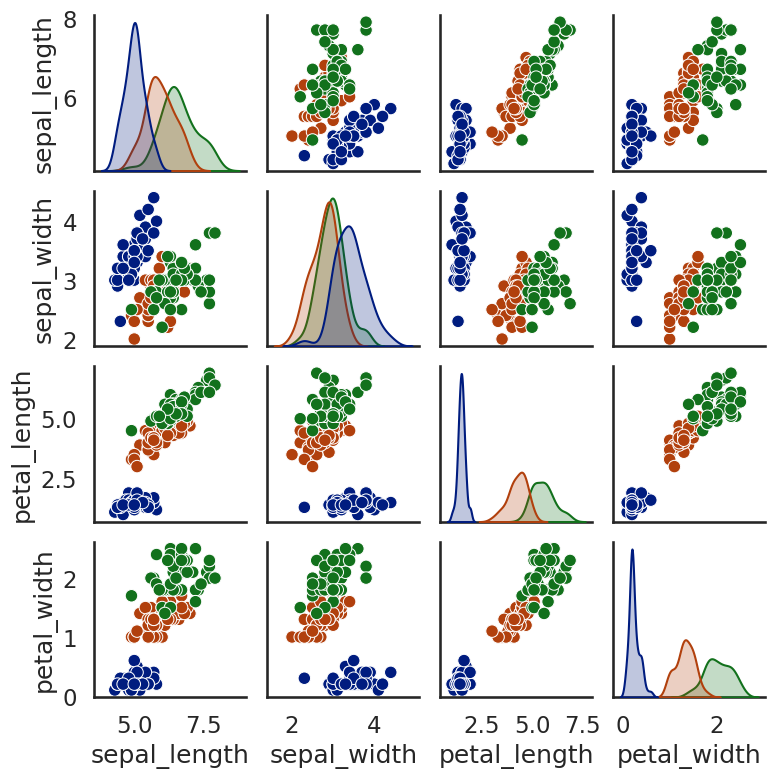

In [ ]:
plot= sns.pairplot(data, hue= 'species', size=2)
plot._legend.remove()

# **Seaborn Hexbin Plot**

it gives the density of where the most similar points are being held

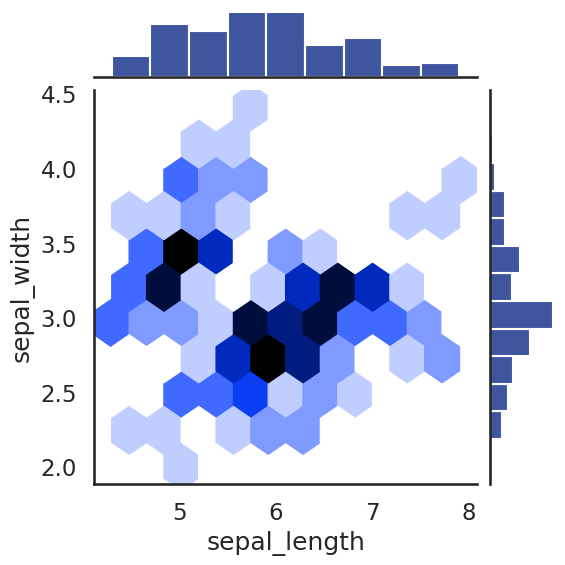

In [ ]:
sns.jointplot(x=data.sepal_length, y=data.sepal_width, kind='hex')

# **Seaborn Facet Grid**

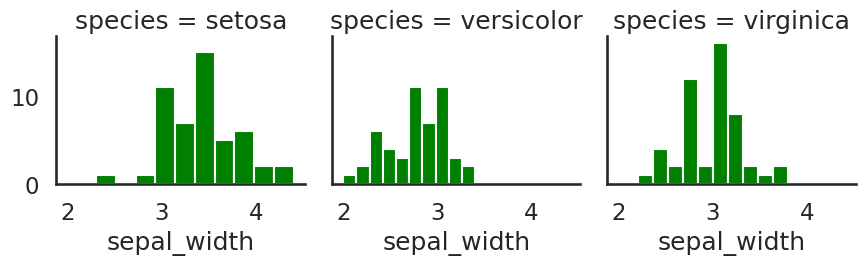

In [ ]:
plot= sns.FacetGrid(data, col='species', margin_titles=True)
plot.map(plt.hist, 'sepal_width', color='green')

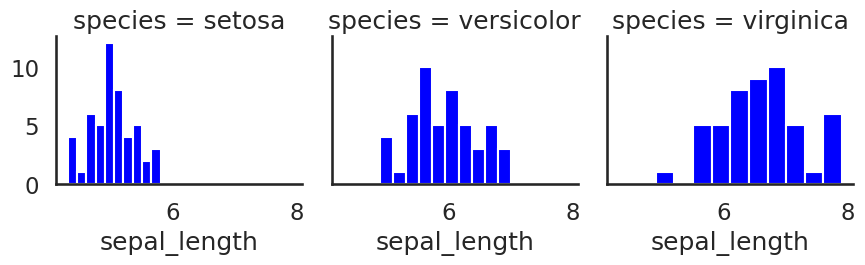

In [ ]:
plot= sns.FacetGrid(data, col='species', margin_titles=True)
plot.map(plt.hist, 'sepal_length', color='blue')